In [1]:
# library import
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')
tweets_biden = pd.read_csv('./drive/MyDrive/Colab Notebooks/Tweets.csv', lineterminator='\n', parse_dates = True)

Mounted at /content/drive


In [4]:
# Ameryka to Ameryka 
tweets_biden['airline'].replace({'United States':'United States of America'}, inplace = True)

In [5]:
tweets_biden.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
print('Total number of records in Biden dataset: ', tweets_biden.shape)

biden_initial_count = tweets_biden.shape[0]

Total number of records in Biden dataset:  (14640, 15)


In [7]:
# changing the variable type to datetime object
tweets_biden['tweet_created']=pd.to_datetime(tweets_biden['tweet_created'])

# creating an additional time feature
tweets_biden['tweet_created']=tweets_biden['tweet_created'].dt.strftime('%Y-%m-%d %H')

In [8]:
print('Total number of records in Biden dataset: ', tweets_biden.shape)

biden_initial_count = tweets_biden.shape[0]

Total number of records in Biden dataset:  (14640, 15)


In [9]:
# library import
import matplotlib.pyplot as plt # basic data visualization

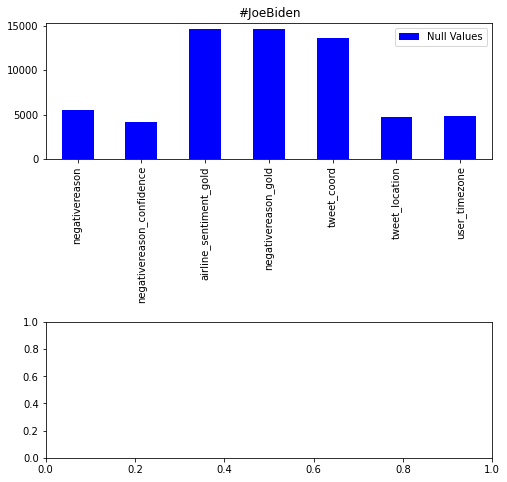

In [10]:
na_biden = pd.DataFrame( {'Null Values': tweets_biden.isna().sum()})
na_biden = na_biden.loc[ na_biden ['Null Values'] > 0]

# bar plot about null values in datasets
fig, ax = plt.subplots(2, 1, 
                       figsize = (8, 8), 
                       gridspec_kw = {'hspace': 1.2})

na_biden.plot.bar(color = 'blue', ax = ax[0])
ax[0].set_title('#JoeBiden')
ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                      rotation = 90)

plt.show()

In [11]:
# function for helping visualization and plotting
import seaborn as sns
import matplotlib.cm as cm
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

heatmap1_args = dict(annot=True, fmt='.0f', square=False, cmap= cm.get_cmap("RdGy", 10), center = 90, vmin=0, vmax=10000, lw=4, cbar=False)
heatmap2_args = dict(annot=True, fmt='.3f', square=False, cmap="Greens", center = 0.5, lw=4, cbar=False)
heatmap3_args = dict(annot=True, fmt='.0f', square=False, cmap=cmap, center = 9200, lw=4, cbar=False)

def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax

def draw_heatmap1(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap1_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm  

def draw_heatmap2(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap2_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def draw_heatmap3(df,this_ax):
    hm = sns.heatmap(df, ax = this_ax, **heatmap3_args)
    this_ax.set_yticklabels(this_ax.get_yticklabels(), rotation=0)
    this_ax.yaxis.tick_right()
    this_ax.yaxis.set_label_position("right")
    for axis in ['top','bottom','left','right']:
        this_ax.spines[axis].set_visible(True)
        this_ax.spines[axis].set_color('black')
    return hm 

def thousands1(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

#formatterK1 = FuncFormatter(thousands1)

def thousands2(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

#formatterK2 = FuncFormatter(thousands2)


In [12]:
# merging data for heatmap
source_df=pd.concat([tweets_biden[['name','text','tweet_created']]])
source_df['tweet_created'].replace({'United States of America':'United States'}, inplace=True)
source_df=source_df.fillna('Geo Data NA')
source_df=source_df.drop_duplicates()

sources=pd.DataFrame(source_df.groupby(['name'])['text'].count().sort_values(ascending=False)[:4])
sources=sources.reset_index()
sourceslst=sources.name.to_list()

#region
country=pd.DataFrame(source_df.groupby(['tweet_created'])['text'].count().sort_values(ascending=False)[:4])
country=country.reset_index()
countrylst=country.tweet_created.to_list()

platXtab=pd.DataFrame(source_df.groupby(['name','tweet_created'])['text'].count().unstack().fillna(0))
     

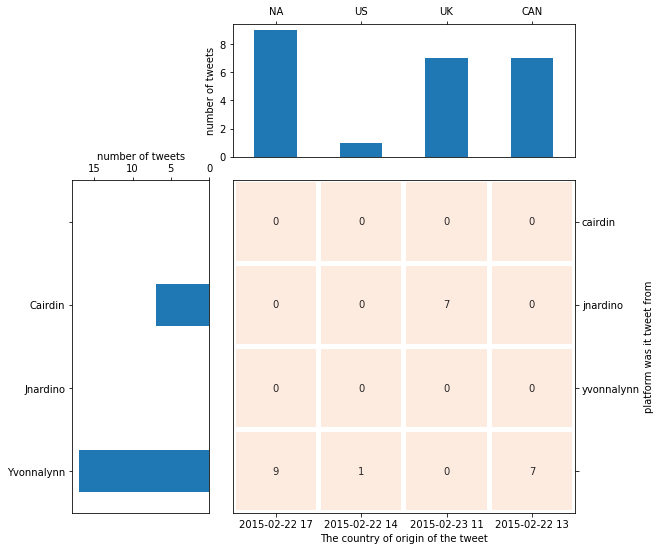

In [13]:
# HEATMAP
fig, ax=plt.subplots(2,2, figsize=(9,9), 
                     gridspec_kw={'height_ratios':[2,5], 'width_ratios':[2,5], 'wspace':0.1, 'hspace':0.1})

hide_ax = ax[0,0]
hide_axes(hide_ax)

hm_ax = ax[1,1]
draw_heatmap1(platXtab.loc[sourceslst,countrylst], hm_ax)
hm_ax.set_xlabel('The country of origin of the tweet')
hm_ax.set_ylabel('platform was it tweet from')
hm_ax.set_yticklabels(('cairdin','jnardino','yvonnalynn'), rotation=0) 

bar_ax = ax[0,1]
platXtab.loc[sourceslst,countrylst].sum().plot.bar(ax=bar_ax)
bar_ax.set_xlabel(bar_ax.get_xlabel())
bar_ax.xaxis.tick_top()
bar_ax.xaxis.set_label_position("top")
#bar_ax.yaxis.set_major_formatter(formatterK1)
bar_ax.set_xticklabels(('NA', 'US', 'UK', 'CAN', 'GE','FRA'), rotation=0) 
bar_ax.set_xlabel('')
bar_ax.set_ylabel('number of tweets')

barh_ax = ax[1,0]
platXtab.loc[sourceslst,countrylst].sum(axis=1)[::-1].plot.barh(ax=barh_ax)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
#barh_ax.xaxis.set_major_formatter(formatterK1)
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_yticklabels(('Yvonnalynn','Jnardino','Cairdin'), rotation=0) 
barh_ax.set_xlabel('number of tweets')
barh_ax.set_ylabel('')
plt.show()